## Data Loading

In [3]:


import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
# Download latest version
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

path = f"{path}\\diabetes_prediction_dataset.csv"

data = pd.read_csv(path)



## Initial Exploration

In [4]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Compute average values for BMI, Hypertension, Glucose, and HbA1c.


In [7]:
print(f'Average value of BMI: {float(data['bmi'].mean())}')

Average value of BMI: 27.3207671


In [8]:
print(f'Average value of Hypertension: {float(data['hypertension'].mean())}')

Average value of Hypertension: 0.07485


In [9]:
print(f'Average value of Glucose Level: {float(data['blood_glucose_level'].mean())}')

Average value of Glucose Level: 138.05806


In [10]:
print(f'Average value of HbA1c Level: {float(data['HbA1c_level'].mean())}')

Average value of HbA1c Level: 5.527507


## Compute and interpret the correlation matrix among these health indicators

In [11]:
rel = data[['bmi', 'hypertension', 'blood_glucose_level', 'HbA1c_level']].corr()
print(rel)


                          bmi  hypertension  blood_glucose_level  HbA1c_level
bmi                  1.000000      0.147666             0.091261     0.082997
hypertension         0.147666      1.000000             0.084429     0.080939
blood_glucose_level  0.091261      0.084429             1.000000     0.166733
HbA1c_level          0.082997      0.080939             0.166733     1.000000


## Visualizations using Seaborn
- ### Histogram of BMI distributions.
- ### Boxplot of Glucose levels grouped by Diabetes Status.
- ### Scatter plot with regression line: HbA1c vs Blood Glucose (sns.regplot).
- ### Heatmap showing the correlation matrix.


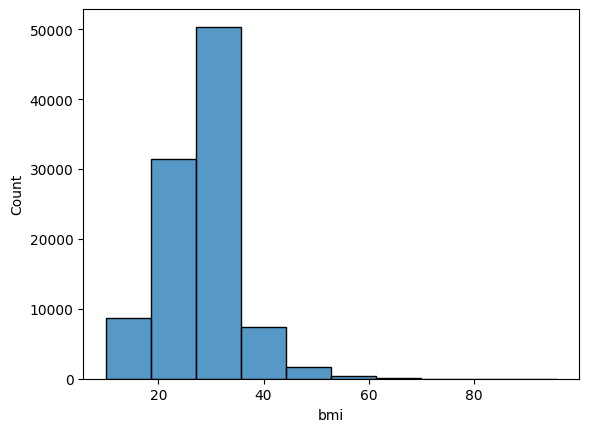

In [43]:
plt.close()
sns.histplot(data = data, x = 'bmi' , bins=10)
plt.savefig('graph1.png')

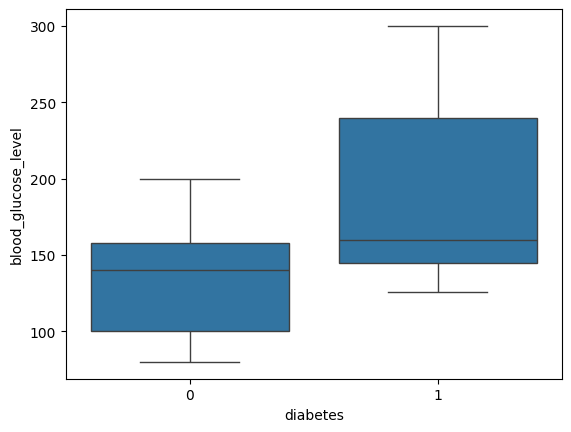

In [44]:
plt.close()
sns.boxplot(data = data , x = 'diabetes' , y = 'blood_glucose_level')
plt.savefig('graph2.png')

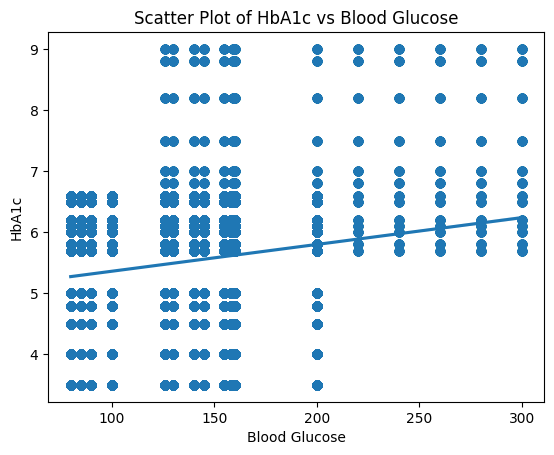

In [45]:
plt.close()
sns.regplot(x='blood_glucose_level', y='HbA1c_level', data=data)
plt.title("Scatter Plot of HbA1c vs Blood Glucose")
plt.xlabel("Blood Glucose")
plt.ylabel("HbA1c")
plt.savefig('graph3.png')
plt.show()


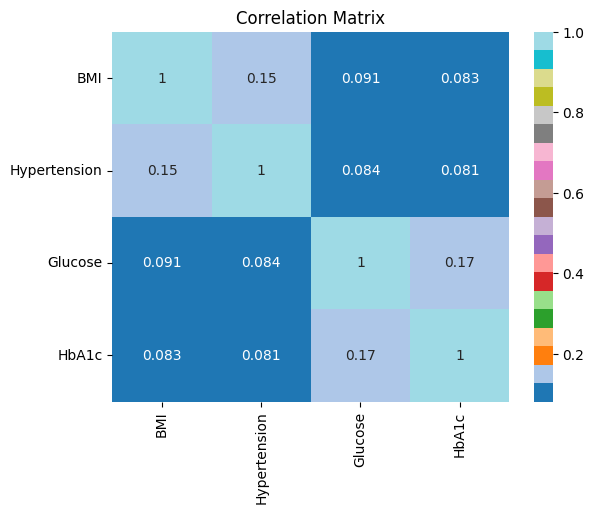

In [46]:
plt.close()
sns.heatmap(rel , annot=True ,cmap='tab20')
plt.title("Correlation Matrix")
plt.xticks([0.5,1.5,2.5,3.5],['BMI', 'Hypertension' , 'Glucose', 'HbA1c'])
plt.yticks([0.5,1.5,2.5,3.5],['BMI', 'Hypertension' , 'Glucose', 'HbA1c'])
plt.savefig('graph4.png')
plt.show()

#  Hypothesis Testing

## Z-Test

In [24]:
mean = float(data['bmi'].mean())
std = float(data['bmi'].std())
sampsize = len(data['bmi'])
claim_mean = 25
z = (mean-claim_mean)/(std/np.sqrt(sampsize))
print(z)

cdf = 0.5 * (1 + math.erf(z / math.sqrt(2)))


p_value = 2 * (1 - cdf)
print("p-value:", p_value)

if p_value >= 0.05:
    print(f"""Fail to reject H₀
p-value is: {p_value}""")
else:
    print(f"""Reject H₀
p-value is: {p_value}""")


110.57931974055543
p-value: 0.0
Reject H₀
p-value is: 0.0


## T-Test

In [32]:


positive = data[data['diabetes'] == 1]['age']
negative = data[data['diabetes'] == 0]['age']

mean_pos = positive.mean()
mean_neg = negative.mean()
std_pos = positive.std()
std_neg = negative.std()
n_pos = len(positive)
n_neg = len(negative)


t = (mean_pos - mean_neg) / np.sqrt((std_pos**2/n_pos) + (std_neg**2/n_neg))

df = ((std_pos**2/n_pos + std_neg**2/n_neg)**2) / (
       ((std_pos**2/n_pos)**2)/(n_pos-1) + ((std_neg**2/n_neg)**2)/(n_neg-1) )


cdf = 0.5 * (1 + math.erf(t / math.sqrt(2)))
p_value = 2 * (1 - cdf)



if p_value < 0.05:
    print(f"""Reject H₀ → Average age is significantly different.
p-value is: {p_value}""")
else:
    print(f"""Fail to reject H₀ → No significant difference in average age.
p-value is: {p_value}""")



Reject H₀ → Average age is significantly different.
p-value is: 0.0


## Chi-Square Test

In [42]:
Obs_count = np.array([
    [
        ((data['smoking_history']=='never') & (data['diabetes']==0)).sum(),
        ((data['smoking_history']=='never') & (data['diabetes']==1)).sum()
    ],
    [
        ((data['smoking_history']=='current') & (data['diabetes']==0)).sum(),
        ((data['smoking_history']=='current') & (data['diabetes']==1)).sum()
    ]
])
chi2 = ((Obs_count - Obs_count.sum(axis=0) * Obs_count.sum(axis=1)[:,None] / Obs_count.sum())**2 / (Obs_count.sum(axis=0) * Obs_count.sum(axis=1)[:,None] / Obs_count.sum())).sum()
if chi2 > 3.84:
    print("Reject H₀ → Smoking related to Diabetes")
else:
    print("Fail to reject H₀ → No relation")

Fail to reject H₀ → No relation


In [30]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [39]:
Obs_count

array([[31749,  3346],
       [ 8338,   948]])